In [38]:
# Importamos las librerias que vamos a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
sns.set_theme()


In [3]:
# Descargamos en archivo cvs a un dataframe
Df_SonidosNyc = pd.read_csv(r'c:\Users\LIBARDO\Libardo A\Henry\Archivos PF\annotations.csv')

In [10]:
# Revisamos los datos a nivel gloval
Df_SonidosNyc.head()

,split,sensor_id,audio_filename,annotator_id,borough,block,latitude,longitude,year,week,...,7-X_other-unknown-human-voice_proximity,8-1_dog-barking-whining_proximity,1_engine_presence,2_machinery-impact_presence,3_non-machinery-impact_presence,4_powered-saw_presence,5_alert-signal_presence,6_music_presence,7_human-voice_presence,8_dog_presence
0,test,0,00_026884.wav,-6,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,1,0,-1,-1,-1,-1,-1
1,test,0,00_026884.wav,-4,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
2,test,0,00_026884.wav,-3,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
3,test,0,00_026884.wav,-1,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,test,0,00_026884.wav,0,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,0,1,0,0,0,0,0


In [7]:
# Validamos las columnas que tiene el dataset
Df_SonidosNyc.columns

Index(['split', 'sensor_id', 'audio_filename', 'annotator_id', 'borough',
       'block', 'latitude', 'longitude', 'year', 'week', 'day', 'hour',
       '1-1_small-sounding-engine_presence',
       '1-2_medium-sounding-engine_presence',
       '1-3_large-sounding-engine_presence',
       '1-X_engine-of-uncertain-size_presence', '2-1_rock-drill_presence',
       '2-2_jackhammer_presence', '2-3_hoe-ram_presence',
       '2-4_pile-driver_presence',
       '2-X_other-unknown-impact-machinery_presence',
       '3-1_non-machinery-impact_presence', '4-1_chainsaw_presence',
       '4-2_small-medium-rotating-saw_presence',
       '4-3_large-rotating-saw_presence',
       '4-X_other-unknown-powered-saw_presence', '5-1_car-horn_presence',
       '5-2_car-alarm_presence', '5-3_siren_presence',
       '5-4_reverse-beeper_presence',
       '5-X_other-unknown-alert-signal_presence',
       '6-1_stationary-music_presence', '6-2_mobile-music_presence',
       '6-3_ice-cream-truck_presence',
       '6-X

# Contenido del cvs sonidos recolectados en NYC
En el dataset anterior contiene datos sobre la contaminación auditiva que se produce en diferentes partes de la ciudad de New York, lo cual se toma por medio de un sensor el cual toma diferentes variables como sonido de taladros, animales, personas, autos y demas, por lo que en este dataset no cuenta con una metrica exacta de la contaminación auditiva, si no por lo contrario variables de ausencia de las mismas, más no una metrica con la que se pueda medir el nivel de contaminación..

In [11]:
# Descargamos el cvs de calidad del aire a un dataframe 
df_Calidad_del_aire = pd.read_csv(r'c:\Users\LIBARDO\Libardo A\Henry\Archivos PF\Calidad_del_aire.csv')

In [12]:
# Revisampos el dataset de manera general
df_Calidad_del_aire.head()

,indicator_id,name,measure,geo_type_name,geo_join_id,data_value,geo_place_name,measure_info,time_period,message,start_date,unique_id
0,643,Annual vehicle miles traveled,million miles,CD,107,50.0,Upper West Side (CD7),per km2,2016,NaN,2016-01-01T00:00:00.000,325247
1,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,Borough,5,7.8,Staten Island,"per 100,000",2005-2007,NaN,2005-01-01T00:00:00.000,131026
2,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,UHF42,504,7.5,South Beach - Tottenville,"per 100,000",2005-2007,NaN,2005-01-01T00:00:00.000,131020
3,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,Borough,5,2.3,Staten Island,µg/m3,2005,NaN,2005-01-01T00:00:00.000,130780
4,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,UHF42,211,3.1,Williamsburg - Bushwick,µg/m3,2005,NaN,2005-01-01T00:00:00.000,130750


In [13]:
# Revisamos la información de cada columna como los valores faltantes 
df_Calidad_del_aire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16218 entries, 0 to 16217
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   indicator_id    16218 non-null  int64  
 1   name            16218 non-null  object 
 2   measure         16218 non-null  object 
 3   geo_type_name   16218 non-null  object 
 4   geo_join_id     16218 non-null  int64  
 5   data_value      16218 non-null  float64
 6   geo_place_name  16218 non-null  object 
 7   measure_info    16218 non-null  object 
 8   time_period     16218 non-null  object 
 9   message         0 non-null      float64
 10  start_date      16218 non-null  object 
 11  unique_id       16218 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB


In [14]:
# Borramos las columna message ya que todos sus valores son nulos
df_Calidad_del_aire = df_Calidad_del_aire.drop('message', axis= 1)

In [25]:
# sacamos los diferentes nombres de la columna name que cuenta con 18 diferentes nombres de indicadores
unicos = df_Calidad_del_aire['name'].nunique()
unicos

18

In [27]:
df_Calidad_del_aire['measure'].unique()

array(['million miles', 'Estimated annual rate',
       'Annual average concentration',
       'Estimated annual rate (under age 18)', 'Mean',
       'Estimated annual rate (age 18+)',
       'Estimated annual rate (age 30+)', 'Number per km2'], dtype=object)

In [26]:
# sacamos los valores diferentes de texto para saber cuantas maneras se toman las medidas del indicador
unicos  = df_Calidad_del_aire['measure'].nunique()
unicos

8

In [28]:
df_Calidad_del_aire['geo_type_name'].unique()

array(['CD', 'Borough', 'UHF42', 'UHF34', 'Citywide'], dtype=object)

In [29]:
# Valores unicos de las diferentes geografias donde se tomo las medidas
unicos  = df_Calidad_del_aire['geo_type_name'].nunique()
unicos

5

In [32]:
# Valores unicos de barrios que en su efecto son 114
df_Calidad_del_aire['geo_place_name'].nunique()

114

In [34]:
df_Calidad_del_aire['measure_info'].unique()

array(['per km2', 'per 100,000', 'µg/m3', 'per 100,000 children', 'ppb',
       'mcg/m3', 'per 100,000 adults', 'number'], dtype=object)

In [35]:
# Diferentes unidades sobre la medida 
df_Calidad_del_aire['measure_info'].nunique()

8

In [36]:
# Diferentes rangos de tiempos para los datos
df_Calidad_del_aire['time_period'].unique()

array(['2016', '2005-2007', '2005', 'Winter 2013-14', 'Winter 2008-09',
       'Summer 2014', 'Winter 2017-18', 'Annual Average 2019',
       'Annual Average 2009', 'Annual Average 2011',
       'Annual Average 2020', 'Winter 2018-19', '2015-2017',
       'Annual Average 2015', '2012-2014', '2011', '2014', '2009-2011',
       'Summer 2019', 'Annual Average 2012', 'Summer 2016', 'Summer 2011',
       'Summer 2010', '2-Year Summer Average 2009-2010', 'Summer 2009',
       'Annual Average 2010', 'Winter 2012-13', 'Summer 2013',
       'Summer 2021', 'Annual Average 2018', 'Annual Average 2016',
       'Winter 2019-20', 'Summer 2015', 'Summer 2018', 'Summer 2020',
       'Annual Average 2014', 'Summer 2012', 'Winter 2020-21',
       'Winter 2015-16', '2013', '2015', 'Winter 2010-11',
       'Annual Average 2021', 'Annual Average 2013', 'Winter 2016-17',
       'Winter 2011-12', 'Winter 2009-10', 'Summer 2017',
       'Annual Average 2017', 'Winter 2014-15'], dtype=object)

In [43]:
# Realizamos la transformación del tipo de fecha start_date a un formato correcto 
warnings.filterwarnings("ignore")
df_Calidad_del_aire['Date'] = df_Calidad_del_aire['start_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%f').date())
# Trasformamos la columna a un tipo datetime y luego extraemos solo la fecha
df_Calidad_del_aire['Date'] = pd.to_datetime(df_Calidad_del_aire['Date']).dt.date

,indicator_id,name,measure,geo_type_name,geo_join_id,data_value,geo_place_name,measure_info,time_period,start_date,unique_id,Date
0,643,Annual vehicle miles traveled,million miles,CD,107,50.0,Upper West Side (CD7),per km2,2016,2016-01-01T00:00:00.000,325247,2016-01-01
1,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,Borough,5,7.8,Staten Island,"per 100,000",2005-2007,2005-01-01T00:00:00.000,131026,2005-01-01


In [44]:
# Borramos la columna star_date ya que es cambiada por la date
df_Calidad_del_aire = df_Calidad_del_aire.drop('start_date', axis= 1)
df_Calidad_del_aire.head(2)

,indicator_id,name,measure,geo_type_name,geo_join_id,data_value,geo_place_name,measure_info,time_period,unique_id,Date
0,643,Annual vehicle miles traveled,million miles,CD,107,50.0,Upper West Side (CD7),per km2,2016,325247,2016-01-01
1,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,Borough,5,7.8,Staten Island,"per 100,000",2005-2007,131026,2005-01-01


In [45]:
# Descripción general de dat_value, se puede pareciar que tiene valores muy altos en comparación de los demas
df_Calidad_del_aire.describe()

,indicator_id,geo_join_id,data_value,unique_id
count,16218.000000,1.621800e+04,16218.000000,16218.000000
mean,427.803613,6.097103e+05,19.975917,372730.417746
std,110.921411,7.893388e+06,21.322349,215507.613560
min,365.000000,1.000000e+00,0.000000,121644.000000
25%,365.000000,2.020000e+02,9.050000,173211.250000
50%,375.000000,3.030000e+02,15.300000,325262.500000
75%,386.000000,4.040000e+02,26.037500,605270.750000
max,661.000000,1.051061e+08,424.700000,799868.000000


In [48]:
# Extraemos el año de nuestra columna date
df_Calidad_del_aire['Year'] = df_Calidad_del_aire['Date'].apply(lambda x: x.year)
df_Calidad_del_aire.head(2)

,indicator_id,name,measure,geo_type_name,geo_join_id,data_value,geo_place_name,measure_info,time_period,unique_id,Date,Year
0,643,Annual vehicle miles traveled,million miles,CD,107,50.0,Upper West Side (CD7),per km2,2016,325247,2016-01-01,2016
1,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,Borough,5,7.8,Staten Island,"per 100,000",2005-2007,131026,2005-01-01,2005


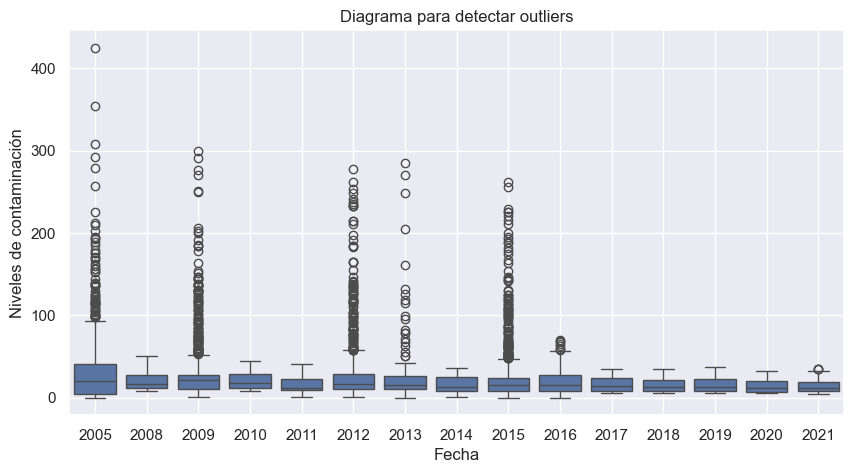

In [51]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Year', y='data_value', data=df_Calidad_del_aire)
plt.xlabel('Fecha')
plt.ylabel('Niveles de contaminación')
plt.title('Diagrama para detectar outliers')
plt.grid(True)
plt.show()

En el anterior dataframe podemos ver que contamos con muchos valores que podrian ser outliers pero que hay que examinar a fondo 

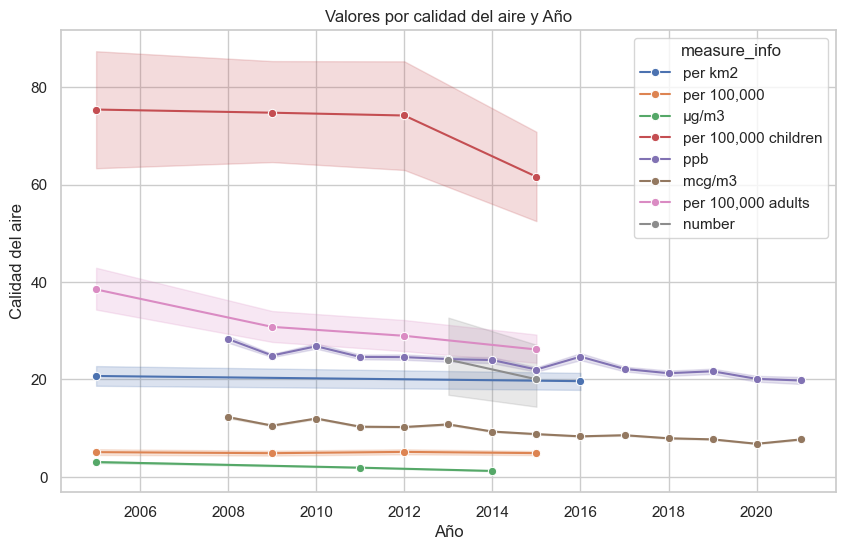

In [53]:
# Configurar el estilo de la gráfica
sns.set(style="whitegrid")

# Crear la gráfica
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_Calidad_del_aire, x='Year', y='data_value', hue='measure_info', marker="o")

# Configurar los ejes
plt.xlabel('Año')
plt.ylabel('Calidad del aire')
plt.title('Valores por calidad del aire y Año')

# Mostrar la gráfica
plt.show()

En el anterio grafico podemos ver las diferentes medidas tomadas de la calidad del aire, donde podemos concluir que en primer lugar los vaores altos pertenecen a 'per 100.000 children' y podriamos descartar la opción de existencia de outliers, otra conclución es que se puede ver una pequeña disminución en la calidad del aire desde el año 2016 hasta los años actuales en todas las diferentes medidas tomadas.

In [54]:

"""df_Calidad_del_aire.to_parquet('Calidad_aire.parquet', engine='pyarrow', index= False)"""

# EDA
KPI
1. Reducción de CO2 y mejora de la calidad del aire

In [91]:
# Acceso a el cvs y se pasa a un dataframe 
df_energy = pd.read_csv('./dataKPI2/energy_clean.csv')

In [92]:
df_energy.head(2)

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,Energy_efficiency,Energy_ratio,CO2_per_capita
0,United States,all_energy_types,1980,78.021113,67.146595,7080.75,227119.0,343.525258,11.018764,4946.627130,0.860621,0.860621,0.021780
1,United States,coal,1980,15.422809,18.597725,7080.75,227119.0,343.525258,11.018764,1409.790188,1.205858,1.205858,0.006207


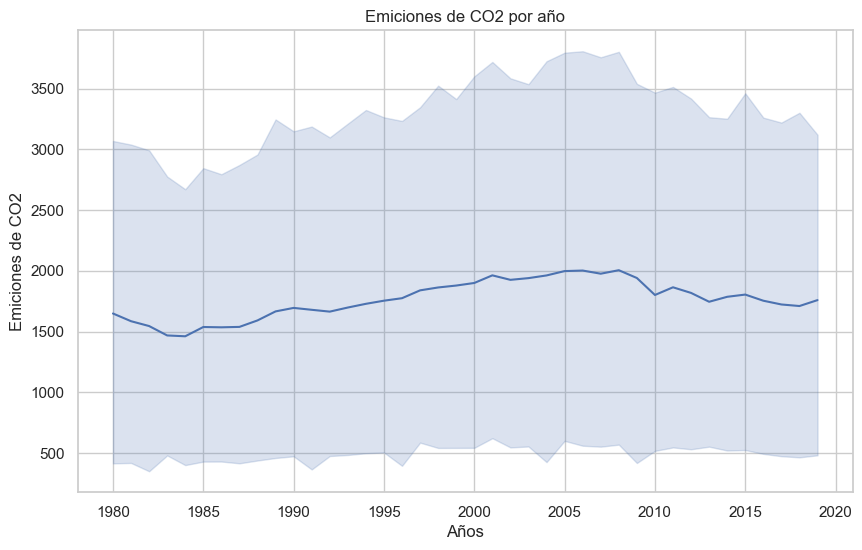

In [94]:
# Visualización de el consumo de las diferentes energias a nivel de Estados Unidos 
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='CO2_emission', data=df_energy)
plt.xlabel('Años')
plt.ylabel('Emiciones de CO2')
plt.title('Emiciones de CO2 por año')
plt.show()

En el anterior grafico se puede ver que tuvimos un pico de emiciones de CO2 entre los años 1995 y 2010, de el año 2010 a tenido una disminución para los años actuales

In [68]:
# Tipos de energia
df_energy['Energy_type'].unique()

array(['all_energy_types', 'coal', 'natural_gas',
       'petroleum_n_other_liquids', 'nuclear', 'renewables_n_other'],
      dtype=object)

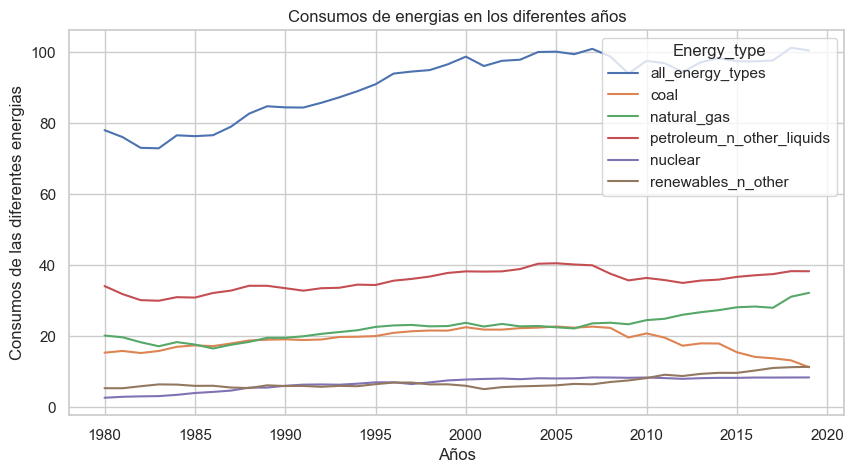

In [70]:
# Visualización de los tipos de energia 
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y= 'Energy_consumption', hue='Energy_type', data= df_energy)
plt.xlabel('Años')
plt.ylabel('Consumos de las diferentes energias')
plt.title('Consumos de energias en los diferentes años')
plt.show()

En el anterior grafico se puede ver un ingremento en el consumo de todas las energias, teniendo como mayor consumo la energia proveniente del petroleo.

In [107]:
# Descarga de el csv a un dataframe
df_eLectric = pd.read_csv('./dataKPI2/vehiculos_electricos_clean.csv')

In [108]:
 # Vista global de los datos
df_eLectric.head(2)

,Model year,Make,Model,Vehicle size,Range (km),CO2 emissions (g/km),Recharge time (h)
0,2012,Mitsubishi,i-MiEV,Small,100,0,7.0
1,2012,Nissan,LEAF,Medium,117,0,7.0


In [109]:
# Información de los datos
df_eLectric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            685 non-null    int64  
 1   Make                  685 non-null    object 
 2   Model                 685 non-null    object 
 3   Vehicle size          685 non-null    object 
 4   Range (km)            685 non-null    int64  
 5   CO2 emissions (g/km)  685 non-null    int64  
 6   Recharge time (h)     685 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 37.6+ KB


In [110]:
# Conteo de vehículos por año 
Conteo_vehiculos = df_eLectric['Model year'].value_counts().sort_index()

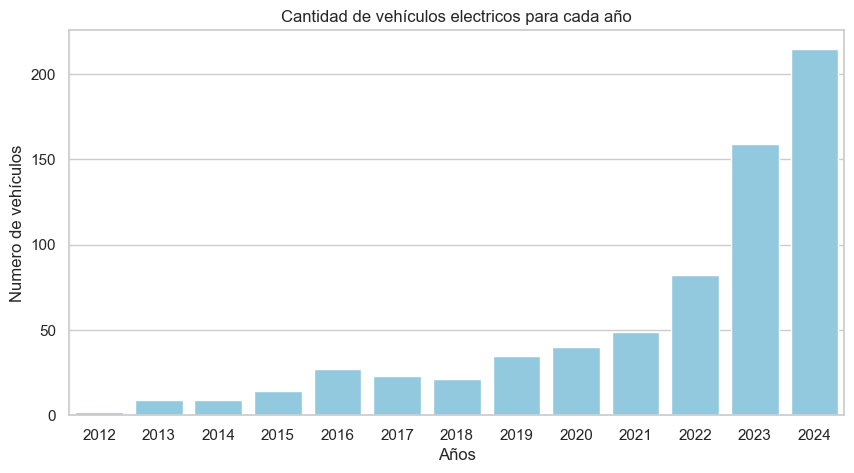

In [111]:
# Visualización de la cantidad de vehículos comprados en los diferentes años
plt.figure(figsize=(10, 5))
sns.barplot(x= Conteo_vehiculos.index, y= Conteo_vehiculos.values, color='skyblue')
plt.xlabel('Años')
plt.ylabel('Numero de vehículos')
plt.title('Cantidad de vehículos electricos para cada año')
plt.show()

En el anterior grafico podemos ver como la compra de vehículos electricos se ha estado incrementando, evitando con su uso 0 emiciones de CO2

In [112]:
# Descarga de un csv a un dataframe 
df_Hybrid = pd.read_csv('./dataKPI2/vehiculos_hibridos_clean.csv')

In [113]:
# Visualización general de los datos
df_Hybrid.head(2)

,Model year,Make,Model,Vehicle class,Motor (kW),Engine size (L),Cylinders,Transmission,Fuel type 1,Combined Le/100 km,...,Recharge time (h),Fuel type 2,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Range 2 (km),CO2 emissions (g/km),CO2 rating,Smog rating,Total Range (km)
0,2012,Chevrolet,Volt,Compact,111,1.4,4,AV,B,2.5 (22.3 kWh/100 km),...,4.0,Z,6.7,5.9,6.4,550,54,NaN,NaN,606
1,2013,Chevrolet,Volt,Compact,111,1.4,4,AV,B,2.4 (21.4 kWh/100 km),...,4.0,Z,6.7,5.9,6.4,550,45,NaN,NaN,611


In [114]:
conteo_de_vehiculosH = df_Hybrid['Model year'].value_counts().sort_index()

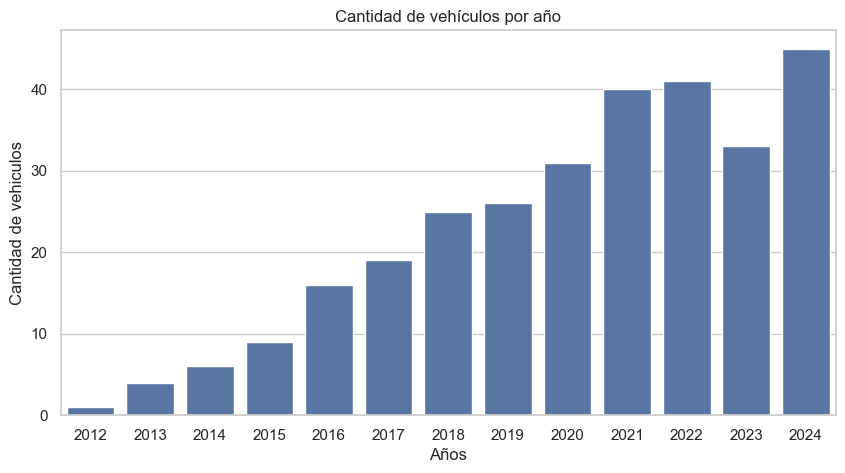

In [115]:
plt.figure(figsize=(10,5))
sns.barplot(x=conteo_de_vehiculosH.index, y=conteo_de_vehiculosH.values)
plt.xlabel('Años')
plt.ylabel('Cantidad de vehiculos')
plt.title('Cantidad de vehículos por año')
plt.show()